In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

+) Thuật toán SIFT dùng để phát hiện các 'keypoints' của một ảnh để có thể tìm (map) một đối tượng cần tìm từ ảnh này sang ảnh khác.\
+) Một lợi thế lớn của thuật toán SIFT là không bị ảnh hưởng bới kích cỡ và hướng (orientation) của đối tượng khi tìm kiếm trong ảnh khác.\
+) Thuật toán gồm có 4 bước chính: (Em xin phép viết bằng Tiếng Anh vì tài liệu tìm hiểu cùng bằng Tiếng Anh)\
\
    1, Constructing a Scale Space to make features are scale-independent\
        - Reduce noise from images (Gaussian Blur, Median Filter, etc.)\
        - Create a scale space by having other different scales images, generated from original image by reduce the scale of the
        original image half and a blurred versions for each new image.\
        - The ideal number of octaves (number of time an image is scaled by half) should be four, for each octave, the number of 
        images should be five\
        - To enhance the features, Difference of Gaussian (DoG) technique is used. (DoG: For each octave, substracting every
        image from the previous image in the same scale.) The result is used in the next step.\
        \
    2, Keypoint Localization:\
        - To find keypoints, the idea is to find local maxima and minima of the images and then remove low contrast keypoints.\
        - To locate the local maxima and minima, go through every pixel in the image and compare it with its neighboring
        pixels.\
        - To select keypoint, we will approximate each keypoint by applying a second order Taylor expansion, if the result
        is less than 0.03, we will not select that keypoint.\
        \
    3, Orientation Assignment:\
        - Assign orientation to each keypoint, by calculate Gx (partial derivative with respect to x) and Gy (partial derivative 
        with respect to y) (or gradient) of each pixel.\
        - Orientation magnitude = gradient vector magnitude at that point\
        - Orientation angle value = arctan(Gy/Gx) (degree)\
        - Create a Histogram for Magnitude and Orientation: The x-axis is divided into 36 bins (0-9, 10-19, ..., 350-359) (eg.
        if our pixel(gradient magnitude , angle value) = (19.2 , 84.7) then it will fall in the 9th bin, and 9th bin value will
        proportion to the magnitude of the pixel.\
        - The bin which have the highest magnitude will be the orientation for the keypoint.\
        \
    4, Keypoint Descriptor:\
        - Assign a unique fingerprint to each keypoint\
        - We use the neighboring pixels, their orientations, and their magnitude to generate a unique fingerprint for this
        keypoint called a ‘descriptor’.\
        - The descriptors will be partially invariant to the illumination or brightness of the images.\

Text(0.5, 1.0, 'Object Image')

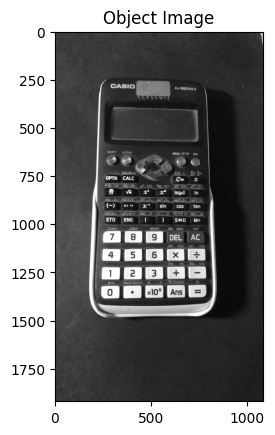

In [2]:
# Processing Object image
filename = 'object.jpg'
img = cv2.imread(filename)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = 'gray')
plt.title('Object Image')

Text(0.5, 1.0, 'Object Keypoints')

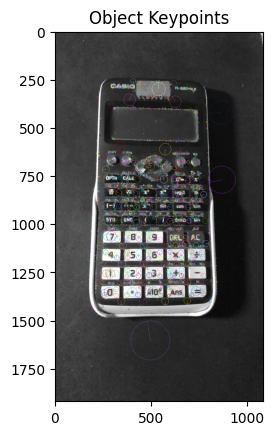

In [3]:
# Create sift
sift = cv2.SIFT_create()

# Detect and draw keypoints of object image
keypoints_1, descriptors_1 = sift.detectAndCompute(img, None) # Mask = None
keypoint_img = cv2.drawKeypoints(gray_img ,keypoints_1, img,
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(keypoint_img)
plt.title('Object Keypoints')

Text(0.5, 1.0, 'Overall Image')

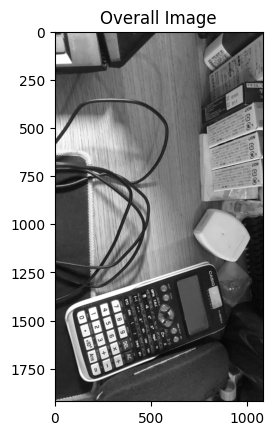

In [7]:
# Processing orginal image
overall_img = cv2.imread('overall.jpg')
gray_overall_img = cv2.cvtColor(overall_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_overall_img, cmap = 'gray')
plt.title('Overall Image')

Text(0.5, 1.0, 'Overall Keypoint')

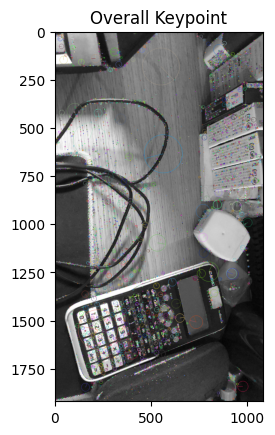

In [8]:
# Detect and draw keypoints of overall image
keypoints_2, descriptors_2 = sift.detectAndCompute(overall_img, None) # Mask = None
keypoint_overall_img = cv2.drawKeypoints(gray_overall_img, keypoints_2, overall_img, 
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(keypoint_overall_img)
plt.title('Overall Keypoint')

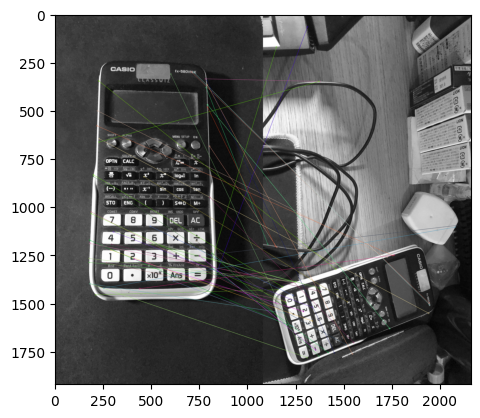

In [9]:
# Features matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance) # Sap xep cac keypoint co khoang cach (giong nhau) gan nhat len dau

mapping_img = cv2.drawMatches(gray_img, keypoints_1, gray_overall_img, keypoints_2, \
                              matches[:50], gray_overall_img, flags=2)            # lay 50 diem gan nhau nhat

plt.imshow(mapping_img)